In [1]:
#importing the necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>The analysis of the dataset - "DataSet-MonthwiseReceiptsDisposal_1" will be carried out in this notebook.</b>

In [2]:
#loading the dataset(csv file) into a dataframe
receipts_disposal = pd.read_csv("E:\\The Institution\\DARPG Hackathon\\DataSet-MonthwiseReceiptsDisposal_1.csv")

In [3]:
#studying the data using the first five observations
receipts_disposal.head()

,org_name,Year,Month,Recetpts,Disposals
0,Central Board of Direct Taxes (Income Tax),2016,1,1600,49
1,Central Board of Direct Taxes (Income Tax),2016,2,2106,207
2,Central Board of Direct Taxes (Income Tax),2016,3,2465,2702
3,Central Board of Direct Taxes (Income Tax),2016,4,1912,1320
4,Central Board of Direct Taxes (Income Tax),2016,5,2797,1588


In [4]:
#finding out the total number of rows and columns in the dataset
receipts_disposal.shape

(5567, 5)

In [5]:
#changing a visible error in the column header
receipts_disposal = receipts_disposal.rename(columns = {"Recetpts":"Receipts"})

In [6]:
#inspecting the data closely for null values and datatypes
receipts_disposal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 5 columns):
org_name     5567 non-null object
Year         5567 non-null int64
Month        5567 non-null int64
Receipts     5567 non-null int64
Disposals    5567 non-null int64
dtypes: int64(4), object(1)
memory usage: 217.6+ KB


<b>The dataset does not contain any missing values</b>. All columns except "org_name" contain integer type values. 

In [7]:
#finding summary statistics
receipts_disposal.describe()

,Year,Month,Receipts,Disposals
count,5567.000000,5567.000000,5567.000000,5567.000000
mean,2017.489851,6.391054,837.197773,688.464703
std,1.102636,3.377380,1631.776291,1591.735766
min,2016.000000,1.000000,1.000000,1.000000
25%,2017.000000,3.000000,82.000000,48.000000
50%,2017.000000,6.000000,264.000000,160.000000
75%,2018.000000,9.000000,888.000000,606.500000
max,2019.000000,12.000000,24977.000000,25005.000000


1.) The mean values of the columns "Receipts" and "Disposals" are much lesser than their respective median values(50%).
2.) There is a large difference between the 75% values and max values of "Receipts" and "Disposals" suggesting the presence of some very high values
3.) The range of values for "Receipts" is 1 to 24977 and "Disposals" is 1 to 25005 

As per the information provided, the receipts and disposals have been recorded for a period of 47 months (January 2016 - November 2019)

In [8]:
#Inspecting the number of unique values/entries in "org_name" column
receipts_disposal["org_name"].value_counts()

Department of Health & Family Welfare               47
Ministry of Electronics & Information Technology    47
Department of Personnel and Training                47
Department of Higher Education                      47
Ministry of Micro Small and Medium  Enterprises     47
                                                    ..
Committee on Petitions Rajya Sabha                   7
Department of Fisheries                              3
National Human Rights Commission                     2
Investment Grievance Redress Cell                    1
National Commission for Scheduled Caste              1
Name: org_name, Length: 129, dtype: int64

There are 129 different departments but not all of them have a complete record of 47 months

In [9]:
#extracting organizations having record of 47 months
org_counts = receipts_disposal['org_name'].value_counts()
org_list = org_counts[org_counts == 47].index.tolist()

print(len(org_list), "out of 129 organizations show a complete record of 47 months and they are as below:")
org_list

76 out of 129 organizations show a complete record of 47 months and they are as below:


['Department of Health & Family Welfare',
 'Ministry of Electronics & Information Technology',
 'Department of Personnel and Training',
 'Department of Higher Education',
 'Ministry of Micro Small and Medium  Enterprises',
 'Ministry of Railways ( Railway Board)',
 'Department of Youth Affairs',
 'Department of Defence Production',
 'Government of Maharashtra',
 'Ministry of Information and Broadcasting',
 'Ministry  of Coal',
 'Department of Food and Public Distribution',
 'Department of Investment & Public Asset Management',
 'Department of School Education and Literacy',
 'Department of Rural Development',
 'Government of Karnataka',
 'Department of Economic Affairs ACC Division',
 'Department of Science and Technology',
 'Department of Expenditure',
 'Central Board of Direct Taxes (Income Tax)',
 'Securities and Exchange Board of India',
 'Ministry of Drinking Water and Sanitation',
 'Government of Jharkhand',
 'Ministry of Home Affairs',
 'Ministry of Ayush',
 'Ministry of Power',

It will be better to consider only these 76 organizations for further analyses. It will also help maintain consistent & complete data entries for forecasting and prediction

In [10]:
#eliminating columns from the dataframe that are no longer required
receipts_disposal = receipts_disposal[receipts_disposal['org_name'].isin(org_list)]
print(receipts_disposal.shape)

(3572, 5)


<b>So, 3572 out of 5576 data entries are being considered for further analysis. </b>

The columns of "Year" and "Month" can be combined together into a datetime column for better understanding and representation.

In [11]:
#combining "Year" and "Month" into a single column
receipts_disposal["Date"] = pd.to_datetime(receipts_disposal["Year"].astype(str) + "-" + receipts_disposal["Month"].astype(str), format = "%Y-%d")
receipts_disposal = receipts_disposal.drop(["Year", "Month"],axis=1)

In [12]:
print("Now the dataframe looks like:")
receipts_disposal.head(10)

Now the dataframe looks like:


,org_name,Receipts,Disposals,Date
0,Central Board of Direct Taxes (Income Tax),1600,49,2016-01-01
1,Central Board of Direct Taxes (Income Tax),2106,207,2016-01-02
2,Central Board of Direct Taxes (Income Tax),2465,2702,2016-01-03
3,Central Board of Direct Taxes (Income Tax),1912,1320,2016-01-04
4,Central Board of Direct Taxes (Income Tax),2797,1588,2016-01-05
5,Central Board of Direct Taxes (Income Tax),2813,2944,2016-01-06
6,Central Board of Direct Taxes (Income Tax),2358,2893,2016-01-07
7,Central Board of Direct Taxes (Income Tax),2676,3929,2016-01-08
8,Central Board of Direct Taxes (Income Tax),2258,2043,2016-01-09
9,Central Board of Direct Taxes (Income Tax),1924,2942,2016-01-10


Before starting with the organization-wise analysis, it is imperative to select relevant organizations. 

Therefore, <b>we select top 10 ministires/organizations/states that generate the highest receipts.</b>

We also collect details about the corresponding nodal officers in each ministry/organization/state using data from the NodalOfficers file

In [13]:
top10orgs = receipts_disposal.groupby('org_name')["Receipts"].sum()


In [14]:
top10orgs.sort_values(ascending=False)[:10]


org_name
Government of Uttar Pradesh                            503114
Department of Financial Services (Banking Division)    391855
Department of Telecommunications                       261335
Ministry of Railways ( Railway Board)                  213276
Government of Maharashtra                              154441
Department of Posts                                    152588
Central Board of Direct Taxes (Income Tax)             140636
Ministry of Labour and Employment                      131283
Ministry of Home Affairs                               107286
Government of Madhya Pradesh                           104370
Name: Receipts, dtype: int64

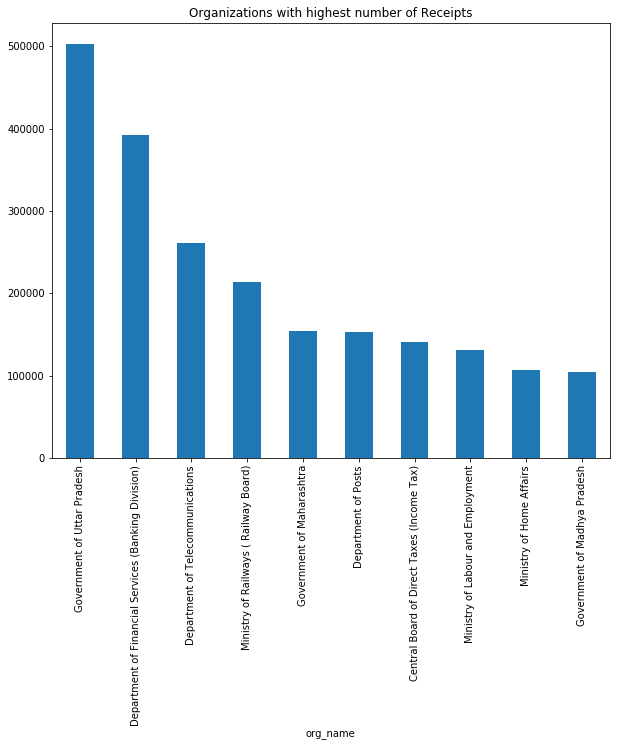

In [15]:
fig = plt.figure(figsize=(10,8))
(top10orgs.sort_values(ascending=False)[:10]).plot.bar(ylim=0)
plt.title("Organizations with highest number of Receipts")
plt.savefig("E:\\The Institution\\DARPG Hackathon\\plot1.png")
plt.show()


It is also observed that the data has been grouped-by according to the organization name from January 2016 to November 2019. So it is better to analyze the receipts and disposals of each organization's data separately. 

The sliced dataframes of each department will be similar in shape with 47 rows and 4 columns

In [16]:
govt_UP = receipts_disposal[receipts_disposal["org_name"]=="Government of Uttar Pradesh"]
govt_UP.head()

,org_name,Receipts,Disposals,Date
3562,Government of Uttar Pradesh,3559,6,2016-01-01
3563,Government of Uttar Pradesh,4255,4,2016-01-02
3564,Government of Uttar Pradesh,5008,8,2016-01-03
3565,Government of Uttar Pradesh,4969,16,2016-01-04
3566,Government of Uttar Pradesh,5877,90,2016-01-05


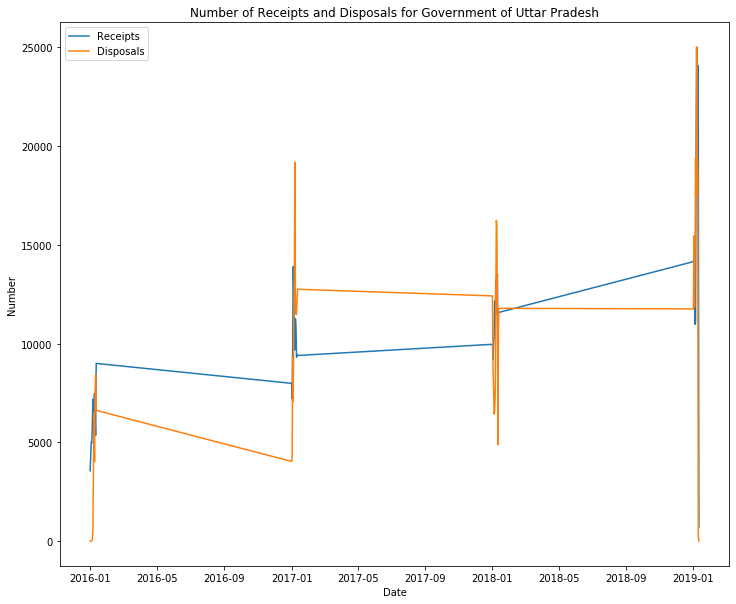

In [17]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(govt_UP.Date,govt_UP.Receipts, label="Receipts")
plt.plot(govt_UP.Date,govt_UP.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Government of Uttar Pradesh")
plt.legend()
plt.savefig("E:\\The Institution\\DARPG Hackathon\\plot2.png")
plt.show()


In [18]:
print("Statistics for the Government of Uttar Pradesh:")
receipts1 = govt_UP.Receipts.sum()
disposals1 = govt_UP.Disposals.sum()
print("Total Receipts generated:", govt_UP.Receipts.sum())
print("Total Number of Disposals:", govt_UP.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts1-disposals1)
print("Efficiency rate:", round(disposals1*100/receipts1))
print("Average number of disposals every month:", round(govt_UP.Disposals.mean()))
print("Number of Nodal Officers:1")

Statistics for the Government of Uttar Pradesh:
Total Receipts generated: 503114
Total Number of Disposals: 440700
Pending Receipts as on 01 November 2019: 62414
Efficiency rate: 88.0
Average number of disposals every month: 9377
Number of Nodal Officers:1


In [19]:
dept_finance = receipts_disposal[receipts_disposal["org_name"]=="Department of Financial Services (Banking Division)"]
dept_finance.head()

,org_name,Receipts,Disposals,Date
934,Department of Financial Services (Banking Divi...,4397,1652,2016-01-01
935,Department of Financial Services (Banking Divi...,5873,3433,2016-01-02
936,Department of Financial Services (Banking Divi...,5296,5542,2016-01-03
937,Department of Financial Services (Banking Divi...,4697,4311,2016-01-04
938,Department of Financial Services (Banking Divi...,8486,5164,2016-01-05


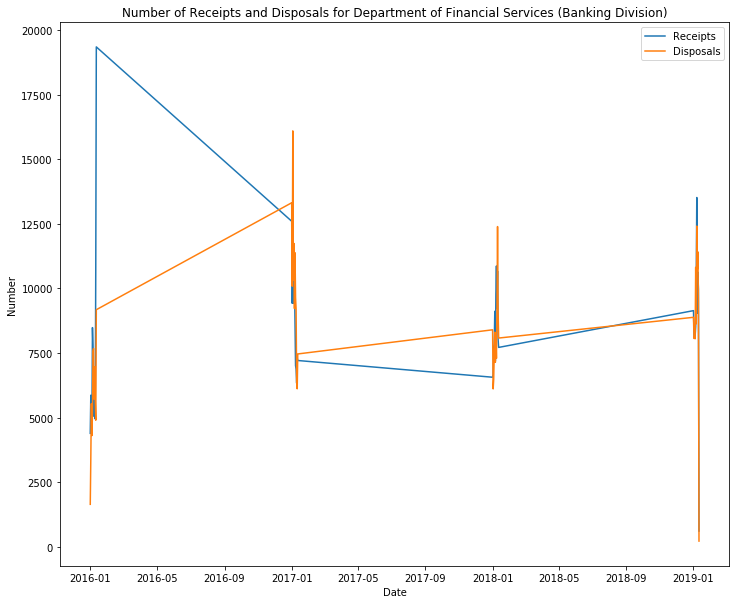

In [20]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(dept_finance.Date,dept_finance.Receipts, label="Receipts")
plt.plot(dept_finance.Date,dept_finance.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Department of Financial Services (Banking Division)")
plt.legend()
plt.show()

In [21]:
print("Statistics for the Department of Financial Services (Banking Division):")
receipts2 = dept_finance.Receipts.sum()
disposals2 = dept_finance.Disposals.sum()
print("Total Receipts generated:", dept_finance.Receipts.sum())
print("Total Number of Disposals:", dept_finance.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts2-disposals2)
print("Efficiency rate:", round(disposals2*100/receipts2))
print("Average number of disposals every month:", round(dept_finance.Disposals.mean()))
print("Number of Nodal Officers:938")

Statistics for the Department of Financial Services (Banking Division):
Total Receipts generated: 391855
Total Number of Disposals: 383908
Pending Receipts as on 01 November 2019: 7947
Efficiency rate: 98.0
Average number of disposals every month: 8168
Number of Nodal Officers:938


In [22]:
dept_telecom = receipts_disposal[receipts_disposal["org_name"]=="Department of Telecommunications"]
dept_telecom.head()

,org_name,Receipts,Disposals,Date
2122,Department of Telecommunications,4336,2199,2016-01-01
2123,Department of Telecommunications,4755,4278,2016-01-02
2124,Department of Telecommunications,5118,5063,2016-01-03
2125,Department of Telecommunications,4806,5123,2016-01-04
2126,Department of Telecommunications,5498,5296,2016-01-05


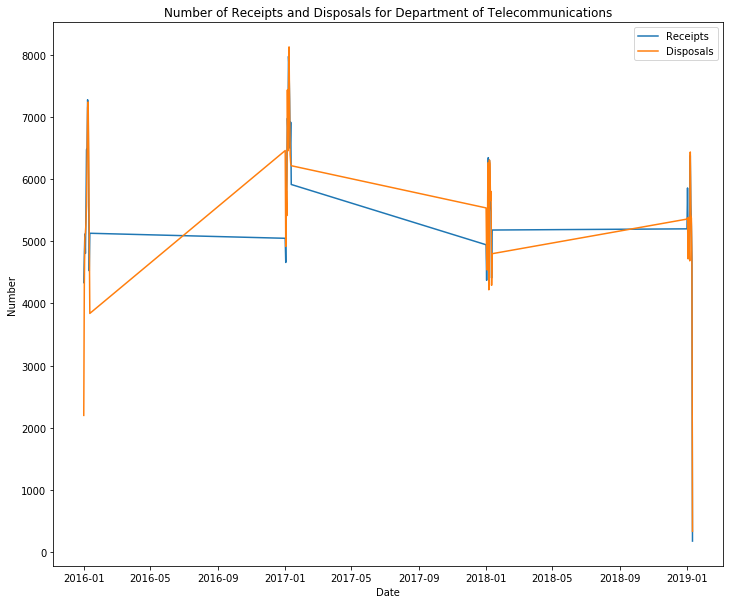

In [23]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(dept_telecom.Date,dept_telecom.Receipts, label="Receipts")
plt.plot(dept_telecom.Date,dept_telecom.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Department of Telecommunications")
plt.legend()
plt.show()

In [24]:
print("Statistics for the Department of Telecommunication:")
receipts3 = dept_telecom.Receipts.sum()
disposals3 = dept_telecom.Disposals.sum()
print("Total Receipts generated:", dept_telecom.Receipts.sum())
print("Total Number of Disposals:", dept_telecom.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts3-disposals3)
print("Efficiency rate:", round(disposals3*100/receipts3))
print("Average number of disposals every month:", round(dept_telecom.Disposals.mean()))
print("Number of Nodal Officers: 1394")

Statistics for the Department of Telecommunication:
Total Receipts generated: 261335
Total Number of Disposals: 258587
Pending Receipts as on 01 November 2019: 2748
Efficiency rate: 99.0
Average number of disposals every month: 5502
Number of Nodal Officers: 1394


In [25]:
min_rail = receipts_disposal[receipts_disposal["org_name"]=="Ministry of Railways ( Railway Board)"]
min_rail.head()

,org_name,Receipts,Disposals,Date
4867,Ministry of Railways ( Railway Board),3898,1268,2016-01-01
4868,Ministry of Railways ( Railway Board),4306,2973,2016-01-02
4869,Ministry of Railways ( Railway Board),8101,3986,2016-01-03
4870,Ministry of Railways ( Railway Board),4283,3946,2016-01-04
4871,Ministry of Railways ( Railway Board),4504,7385,2016-01-05


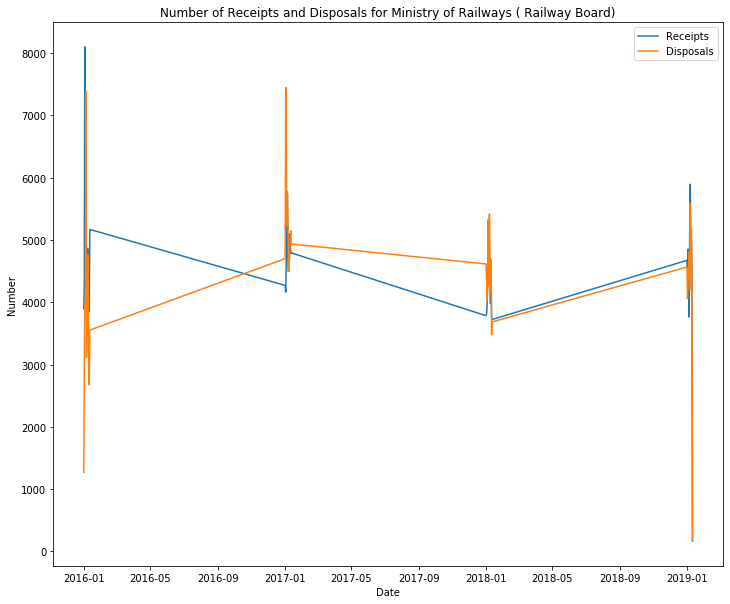

In [26]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(min_rail.Date,min_rail.Receipts, label="Receipts")
plt.plot(min_rail.Date,min_rail.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Ministry of Railways ( Railway Board)")
plt.legend()
plt.show()

In [27]:
print("Statistics for the Ministry of Railways ( Railway Board):")
receipts4 = min_rail.Receipts.sum()
disposals4 = min_rail.Disposals.sum()
print("Total Receipts generated:", min_rail.Receipts.sum())
print("Total Number of Disposals:", min_rail.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts4-disposals4)
print("Efficiency rate:", round(disposals4*100/receipts4))
print("Average number of disposals every month:", round(min_rail.Disposals.mean()))
print("Number of Nodal Officers:1840")

Statistics for the Ministry of Railways ( Railway Board):
Total Receipts generated: 213276
Total Number of Disposals: 208476
Pending Receipts as on 01 November 2019: 4800
Efficiency rate: 98.0
Average number of disposals every month: 4436
Number of Nodal Officers:1840


In [28]:
govt_Maha = receipts_disposal[receipts_disposal["org_name"]=="Government of Maharashtra"]
govt_Maha.head()

,org_name,Receipts,Disposals,Date
2881,Government of Maharashtra,1503,1,2016-01-01
2882,Government of Maharashtra,1831,26,2016-01-02
2883,Government of Maharashtra,1972,46,2016-01-03
2884,Government of Maharashtra,2029,130,2016-01-04
2885,Government of Maharashtra,1955,218,2016-01-05


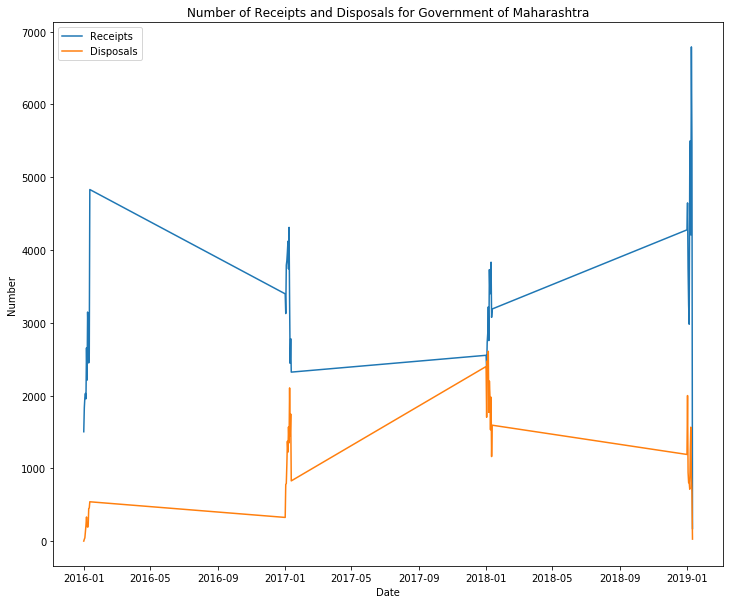

In [29]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(govt_Maha.Date,govt_Maha.Receipts, label="Receipts")
plt.plot(govt_Maha.Date,govt_Maha.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Government of Maharashtra")
plt.legend()
plt.show()

In [30]:
print("Statistics for the Government of Maharashtra:")
receipts5 = govt_Maha.Receipts.sum()
disposals5 = govt_Maha.Disposals.sum()
print("Total Receipts generated:", govt_Maha.Receipts.sum())
print("Total Number of Disposals:", govt_Maha.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts5-disposals5)
print("Efficiency rate:", round(disposals5*100/receipts5))
print("Average number of disposals every month:", round(govt_Maha.Disposals.mean()))
print("Number of Nodal Officers:4232")

Statistics for the Government of Maharashtra:
Total Receipts generated: 154441
Total Number of Disposals: 52032
Pending Receipts as on 01 November 2019: 102409
Efficiency rate: 34.0
Average number of disposals every month: 1107
Number of Nodal Officers:4232


In [31]:
dept_posts = receipts_disposal[receipts_disposal["org_name"]=="Department of Posts"]
dept_posts.head()

,org_name,Receipts,Disposals,Date
1656,Department of Posts,1585,814,2016-01-01
1657,Department of Posts,1717,1702,2016-01-02
1658,Department of Posts,1942,1794,2016-01-03
1659,Department of Posts,2028,1907,2016-01-04
1660,Department of Posts,2180,2086,2016-01-05


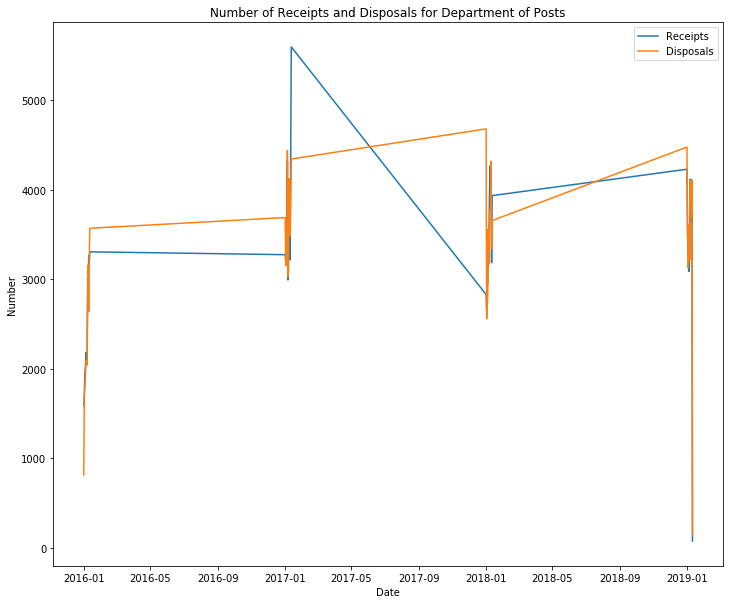

In [32]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(dept_posts.Date,dept_posts.Receipts, label="Receipts")
plt.plot(dept_posts.Date,dept_posts.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Department of Posts")
plt.legend()
plt.show()

In [33]:
print("Statistics for the Department of Posts:")
receipts6 = dept_posts.Receipts.sum()
disposals6 = dept_posts.Disposals.sum()
print("Total Receipts generated:", dept_posts.Receipts.sum())
print("Total Number of Disposals:", dept_posts.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts6-disposals6)
print("Efficiency rate:", round(disposals6*100/receipts6))
print("Average number of disposals every month:", round(dept_posts.Disposals.mean()))
print("Number of Nodal Officers: 1252")

Statistics for the Department of Posts:
Total Receipts generated: 152588
Total Number of Disposals: 150681
Pending Receipts as on 01 November 2019: 1907
Efficiency rate: 99.0
Average number of disposals every month: 3206
Number of Nodal Officers: 1252


In [34]:
cbd_taxes = receipts_disposal[receipts_disposal["org_name"]=="Central Board of Direct Taxes (Income Tax)"]
cbd_taxes.head()

,org_name,Receipts,Disposals,Date
0,Central Board of Direct Taxes (Income Tax),1600,49,2016-01-01
1,Central Board of Direct Taxes (Income Tax),2106,207,2016-01-02
2,Central Board of Direct Taxes (Income Tax),2465,2702,2016-01-03
3,Central Board of Direct Taxes (Income Tax),1912,1320,2016-01-04
4,Central Board of Direct Taxes (Income Tax),2797,1588,2016-01-05


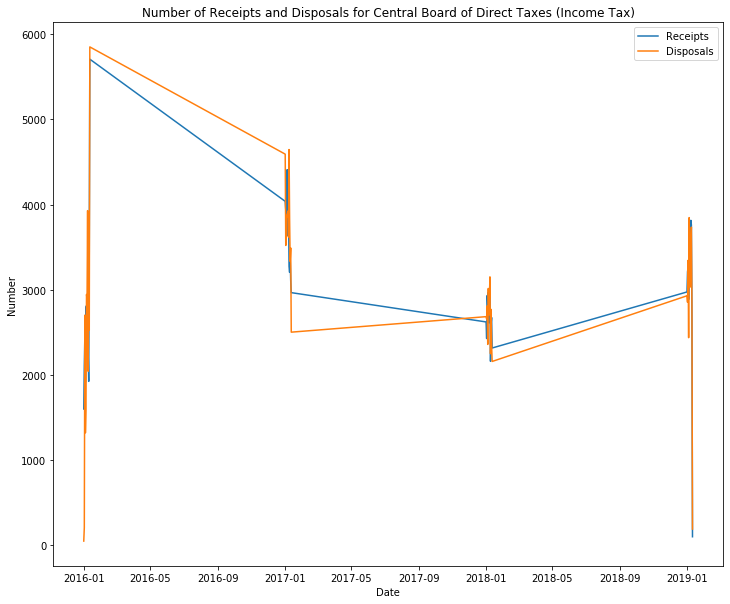

In [35]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(cbd_taxes.Date,cbd_taxes.Receipts, label="Receipts")
plt.plot(cbd_taxes.Date,cbd_taxes.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Central Board of Direct Taxes (Income Tax)")
plt.legend()
plt.show()

In [36]:
print("Statistics for the Central Board of Direct Taxes (Income Tax):")
receipts7 = cbd_taxes.Receipts.sum()
disposals7 = cbd_taxes.Disposals.sum()
print("Total Receipts generated:", cbd_taxes.Receipts.sum())
print("Total Number of Disposals:", cbd_taxes.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts7-disposals7)
print("Efficiency rate:", round(disposals7*100/receipts7))
print("Average number of disposals every month:", round(cbd_taxes.Disposals.mean()))
print("Number of Nodal Officers:5000")

Statistics for the Central Board of Direct Taxes (Income Tax):
Total Receipts generated: 140636
Total Number of Disposals: 138037
Pending Receipts as on 01 November 2019: 2599
Efficiency rate: 98.0
Average number of disposals every month: 2937
Number of Nodal Officers:5000


In [37]:
min_le = receipts_disposal[receipts_disposal["org_name"]=="Ministry of Labour and Employment"]
min_le.head()

,org_name,Receipts,Disposals,Date
4449,Ministry of Labour and Employment,1794,546,2016-01-01
4450,Ministry of Labour and Employment,2222,2638,2016-01-02
4451,Ministry of Labour and Employment,2514,2615,2016-01-03
4452,Ministry of Labour and Employment,1810,1826,2016-01-04
4453,Ministry of Labour and Employment,1628,1662,2016-01-05


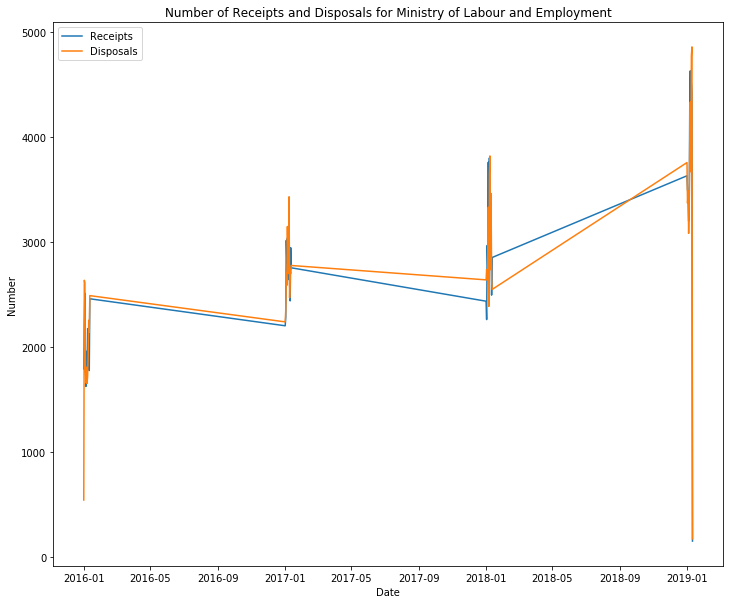

In [38]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(min_le.Date,min_le.Receipts, label="Receipts")
plt.plot(min_le.Date,min_le.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Ministry of Labour and Employment")
plt.legend()
plt.show()

In [39]:
print("Statistics for the Ministry of Labour and Employment:")
receipts8 = min_le.Receipts.sum()
disposals8 = min_le.Disposals.sum()
print("Total Receipts generated:", min_le.Receipts.sum())
print("Total Number of Disposals:", min_le.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts8-disposals8)
print("Efficiency rate:", round(disposals8*100/receipts8))
print("Average number of disposals every month:", round(min_le.Disposals.mean()))
print("Number of Nodal Officers:543")

Statistics for the Ministry of Labour and Employment:
Total Receipts generated: 131283
Total Number of Disposals: 130080
Pending Receipts as on 01 November 2019: 1203
Efficiency rate: 99.0
Average number of disposals every month: 2768
Number of Nodal Officers:543


In [40]:
min_home = receipts_disposal[receipts_disposal["org_name"]=="Ministry of Home Affairs"]
min_home.head()

,org_name,Receipts,Disposals,Date
4308,Ministry of Home Affairs,2170,551,2016-01-01
4309,Ministry of Home Affairs,2076,902,2016-01-02
4310,Ministry of Home Affairs,1962,1831,2016-01-03
4311,Ministry of Home Affairs,1629,1007,2016-01-04
4312,Ministry of Home Affairs,1585,1273,2016-01-05


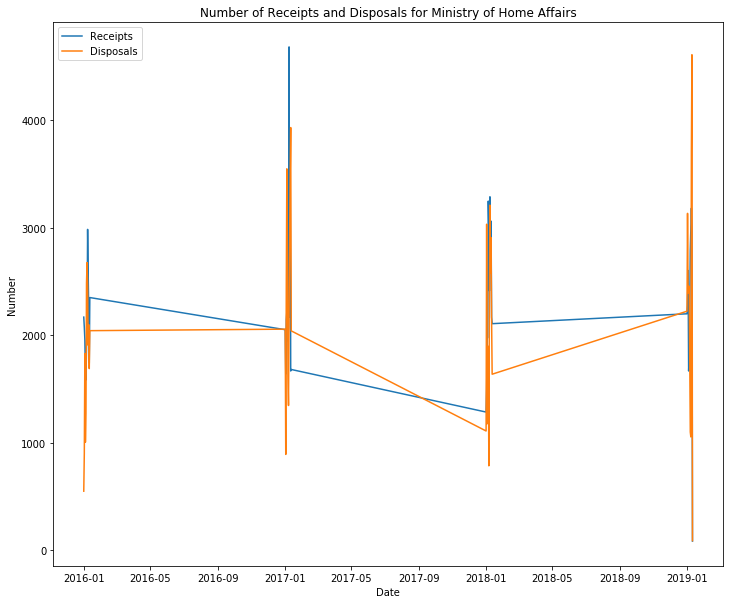

In [41]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(min_home.Date,min_home.Receipts, label="Receipts")
plt.plot(min_home.Date,min_home.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Ministry of Home Affairs")
plt.legend()
plt.show()

In [42]:
print("Statistics for the Ministry of Home Affairs:")
receipts9 = min_home.Receipts.sum()
disposals9 = min_home.Disposals.sum()
print("Total Receipts generated:", min_home.Receipts.sum())
print("Total Number of Disposals:", min_home.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts9-disposals9)
print("Efficiency rate:", round(disposals9*100/receipts9))
print("Average number of disposals every month:", round(min_home.Disposals.mean()))
print("Number of Nodal Officers:101")

Statistics for the Ministry of Home Affairs:
Total Receipts generated: 107286
Total Number of Disposals: 99540
Pending Receipts as on 01 November 2019: 7746
Efficiency rate: 93.0
Average number of disposals every month: 2118
Number of Nodal Officers:101


In [43]:
govt_MP = receipts_disposal[receipts_disposal["org_name"]=="Government of Madhya Pradesh"]
govt_MP.head()

,org_name,Receipts,Disposals,Date
2834,Government of Madhya Pradesh,1076,12,2016-01-01
2835,Government of Madhya Pradesh,1281,26,2016-01-02
2836,Government of Madhya Pradesh,1542,41,2016-01-03
2837,Government of Madhya Pradesh,1200,66,2016-01-04
2838,Government of Madhya Pradesh,1308,19,2016-01-05


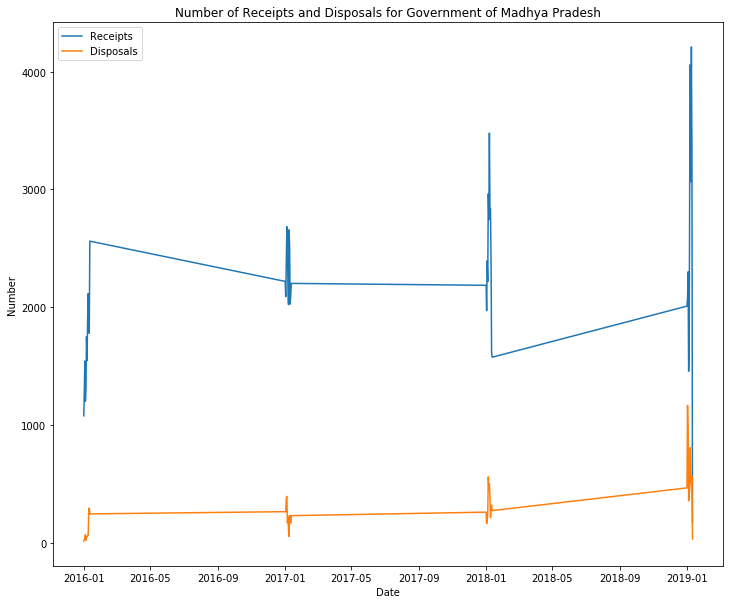

In [44]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(govt_MP.Date,govt_MP.Receipts, label="Receipts")
plt.plot(govt_MP.Date,govt_MP.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Government of Madhya Pradesh")
plt.legend()
plt.show()

In [45]:
print("Statistics for the Government of Madhya Pradesh:")
receipts10 = govt_MP.Receipts.sum()
disposals10 = govt_MP.Disposals.sum()
print("Total Receipts generated:", govt_MP.Receipts.sum())
print("Total Number of Disposals:", govt_MP.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts10-disposals10)
print("Efficiency rate:", round(disposals10*100/receipts10))
print("Average number of disposals every month:", round(govt_MP.Disposals.mean()))
print("Number of Nodal Officers:454")

Statistics for the Government of Madhya Pradesh:
Total Receipts generated: 104370
Total Number of Disposals: 13923
Pending Receipts as on 01 November 2019: 90447
Efficiency rate: 13.0
Average number of disposals every month: 296
Number of Nodal Officers:454


<b>We will now try to forecast the receipts for the Government of Uttar Pradesh for the next 12 months. We consider Uttar Pradesh because it generates the highest number of receipts, maintains a good efficiency rate but has only 1 Nodal officer</b>


In [46]:
#importing necessary libraries
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

from statsmodels.tsa.stattools import adfuller
from numpy import log

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
import warnings
warnings.filterwarnings('ignore')

In [47]:
#dropping Disposals column and stroing the dataset as a new CSV file
govt_UP_receipts = govt_UP.drop(["Disposals","org_name"], axis=1)
govt_UP_receipts.to_csv("E:\\The Institution\\DARPG Hackathon\\Govt_UP_Receipts.csv")

In [48]:
#importing the new CSV file in a separate DataFrame for further analysis and setting Date column as index
df = pd.read_csv("E:\\The Institution\\DARPG Hackathon\\Govt_UP_Receipts", parse_dates=['Date'],  index_col='Date')

In [49]:
df.head()

,Receipts
Date,
2016-01-01,3559
2016-01-02,4255
2016-01-03,5008
2016-01-04,4969
2016-01-05,5877


The data now is in the form of a time series. So will try to apply time series forecasting using the ARIMA Model


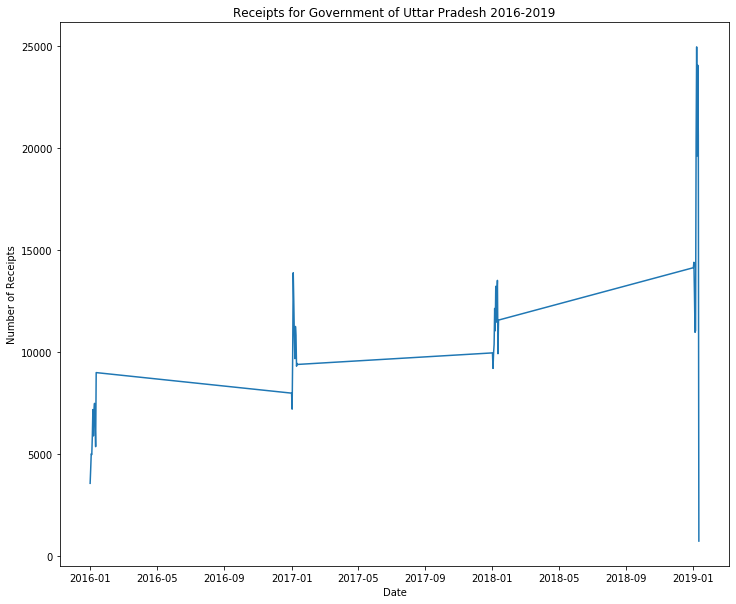

In [50]:
#visualizing the time series
plt.figure(figsize=(12,10))
plt.plot(df)
plt.title("Receipts for Government of Uttar Pradesh 2016-2019")
plt.xlabel("Date")
plt.ylabel("Number of Receipts")
plt.show()

In [51]:
#performing the Dickey Fuller Test
result = adfuller(df.Receipts, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.2653379136170884
p-value: 0.01650077625164986
Critial Values:
   1%, -3.5925042342183704
Critial Values:
   5%, -2.931549768951162
Critial Values:
   10%, -2.60406594375338


<b>The p value(0.016) is less than the value of significance(0.05), so we can proceed without differencing the time series</b>

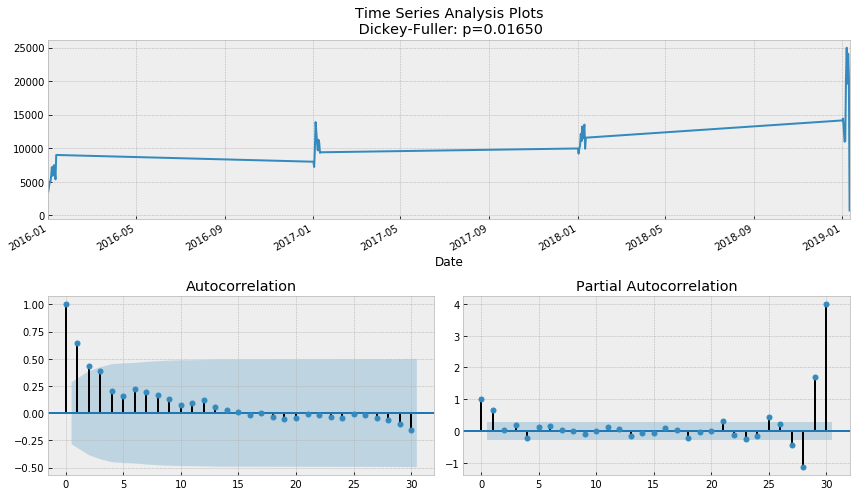

In [52]:
#Time Series Analysis Plots - Autocorrelation and Correlation plots
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        plt.savefig("E:\\The Institution\\DARPG Hackathon\\plot3.png")
        
tsplot(df.Receipts, lags=30)

In [53]:
#analyzing the ACF and PACF plots to find out p and q
print("Order of AR term(p):1")
print("Order of MA term(q):1")
print("Order of Differencing(d):0")

Order of AR term(p):1
Order of MA term(q):1
Order of Differencing(d):0


<b>Building the ARIMA Model with obtained parameters</b>

In [54]:
from statsmodels.tsa.arima_model import ARIMA

# 1,0,1 ARIMA Model
model = ARIMA(df.Receipts, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:               Receipts   No. Observations:                   47
Model:                     ARMA(1, 1)   Log Likelihood                -447.362
Method:                       css-mle   S.D. of innovations           3240.100
Date:                Sun, 12 Jan 2020   AIC                            902.723
Time:                        16:20:44   BIC                            910.124
Sample:                             0   HQIC                           905.508
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9995.8688   1499.550      6.666      0.000    7056.805    1.29e+04
ar.L1.Receipts     0.4662      0.167      2.797      0.008       0.140       0.793
ma.L1.Receipts     0.7068      0.115

The model results are looking good and the p-values also seem to be significant

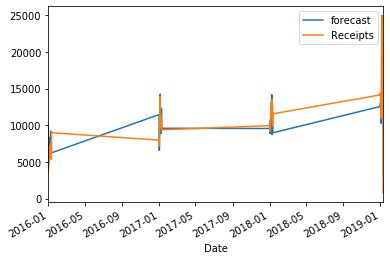

In [55]:

#predicting values from the model built

model_fit.plot_predict(dynamic=False)
plt.savefig("E:\\The Institution\\DARPG Hackathon\\plot4.png")
plt.show()

In [56]:
#check the predicted values
predictions = model_fit.predict()
predictions

Date
2016-01-01     9995.868763
2016-01-02     5345.370086
2016-01-03     6734.872800
2016-01-04     6581.307884
2016-01-05     6570.846198
2016-01-06     7597.377871
2016-01-07     8389.359739
2016-01-08     6321.141799
2016-01-09     9218.052766
2016-01-10     7599.814390
2016-01-11     7586.920943
2016-01-12     6258.775073
2017-01-01    11460.588678
2017-01-02     6601.963289
2017-01-03     9115.097179
2017-01-04    10437.918150
2017-01-05    14253.703508
2017-01-06     9909.680550
2017-01-07    11017.660859
2017-01-08     8900.764262
2017-01-09    12249.277284
2017-01-10     9358.101069
2017-01-11     9639.764562
2017-01-12     9599.036778
2018-01-01     9570.345434
2018-01-02    10254.565865
2018-01-03     8878.255133
2018-01-04    10724.987323
2018-01-05     9938.145473
2018-01-06    12554.166734
2018-01-07     9418.260090
2018-01-08    14195.558509
2018-01-09     8760.136415
2018-01-10    13999.145511
2018-01-11    11299.006487
2018-01-12     8985.775023
2019-01-01    12556.351

In [57]:
#making a forecast for further 12 months
forecasted_values = model_fit.forecast(steps=12)

Likewise, predictions can be made for other departments too. Depending upon the results, necessary ammendments can be made into the areas of concern